# Reinforcement Learning: An Introduction 2nd Edition - Example 6.6

Environment: [Example 6.6: Cliff Walking](http://incompleteideas.net/book/bookdraft2017nov5.pdf#page=126)

## Environment Settings

I use same settings of the environment.

Observation:
* $4 \times 12$ grid
* cliff - 3 row 1 to 10 columns 

Actions:
* up  
* down  
* left  
* right  

Hyperparameters:
* $\epsilon = 0.1$  
* $\alpha = 0.5$  
* $\gamma = 1$  
* 500 episodes

## Source Codes

In [198]:
import sys
import os
sys.path.append(os.pardir)

import numpy as np
from rl import QLearning, Sarsa, Transition
from rl.environment import CliffWalking
import matplotlib.pyplot as plt

### Define test function

In [199]:
def test_env(env: CliffWalking, q_learnig: QLearning, sarsa: Sarsa):
    shape_x, shape_y = env.obs_shape
    
    start_state = env.reset()
    goal_state = env.goal_state
    
    current_state = start_state
    q_learning_trace_states = [current_state]
    q_learning_total_rewards = 0
    
    # start an episode with q-learning
    for i in range(1000):
        current_action = q_learnig.get_action(current_state)
        next_state, reward, terminated = env.step(current_action)
        q_learning_trace_states.append(next_state)
        q_learning_total_rewards += reward
        
        if terminated:
            break
        
        current_state = next_state
        

    current_state = env.reset()
    sarsa_trace_states = [current_state]
    sarsa_total_rewards = 0
    
    # start an episode with sarsa
    for i in range(1000):
        current_action = sarsa.get_action(current_state)
        next_state, reward, terminated = env.step(current_action)
        sarsa_trace_states.append(next_state)
        sarsa_total_rewards += reward
        
        if terminated:
            break
        
        current_state = next_state
    
    print(f"sarsa: {sarsa_total_rewards}, q-learning: {q_learning_total_rewards}")
    
    q_learning_trace_states = np.array(q_learning_trace_states)
    sarsa_trace_states = np.array(sarsa_trace_states)
    cliff = np.transpose(np.where(env.cliff_area))
    
    # draw grid world
    plt.plot(sarsa_trace_states[:,1], sarsa_trace_states[:,0])
    plt.plot(q_learning_trace_states[:,1], q_learning_trace_states[:,0], "violet")
    plt.plot(cliff[:,1], cliff[:,0], "r")
    plt.scatter(start_state[1], start_state[0], c="red", marker="x")
    plt.scatter(goal_state[1], goal_state[0], c="black", marker="x")
    plt.axis([-1, shape_y, -1, shape_x])
    plt.xticks(range(-1, shape_y + 1))
    plt.yticks(range(-1, shape_x + 1))
    plt.grid()
    plt.tick_params(labelbottom=False, bottom=False, top=True, labeltop=True)
    plt.gca().invert_yaxis()
    plt.show()

### Before training

* red: cliff area
* blue: sarsa
* violet: q-learning
* red x dot: start state
* black x dot: goal state

In [200]:
env = CliffWalking()

cliff_walking_sarsa = Sarsa(env.obs_shape, env.action_count, [env.goal_state])
cliff_walking_q_learning = QLearning(env.obs_shape, env.action_count, [env.goal_state])

sarsa: -1000.0, q-learning: -1000.0


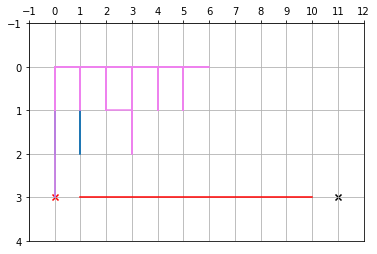

In [201]:
test_env(env, cliff_walking_q_learning, cliff_walking_sarsa)

### Training

In [202]:
def train(env: CliffWalking, algorithm):
    gamma = 1
    alpha = 0.5
    episodes_count = 500
    rewards_arr = []
    
    for episode in range(episodes_count):
        current_state = env.reset()
        terminated = False
        total_rewards = 0
        
        while not terminated:
            current_action = algorithm.get_action(current_state)
            next_state, reward, terminated = env.step(current_action)
            
            if isinstance(algorithm, QLearning):
                transition = Transition(
                    current_state,
                    current_action,
                    next_state,
                    reward
                )
                
                algorithm.update(transition, alpha=alpha, gamma=gamma)
            elif isinstance(algorithm, Sarsa):
                transition = Transition(
                    current_state,
                    current_action,
                    next_state,
                    reward
                )
                
                algorithm.update(transition, alpha=alpha, gamma=gamma)
            else:
                return None
            
            current_state = next_state
            total_rewards += reward
            
        rewards_arr.append(total_rewards)
        
    return rewards_arr

In [203]:
def averages_until_now(data):
    data = np.array(data)
    averages = []
    for i in range(len(data)):
        averages.append(np.mean(data[0:i + 1]))
        
    return averages

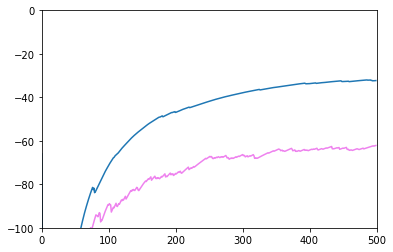

sarsa: -16.0, q-learning: -12.0


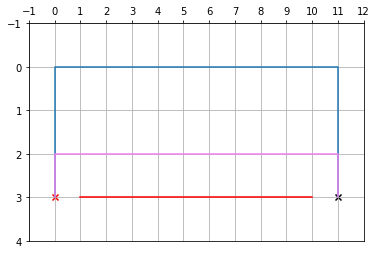

In [204]:
q_learning_rewards = train(env, cliff_walking_q_learning)
sarsa_rewards = train(env, cliff_walking_sarsa)

# training rewards graph
plt.plot(averages_until_now(sarsa_rewards))
plt.plot(averages_until_now(q_learning_rewards), "violet")
plt.axis([0, 500, -100, 0])
plt.show()

# greedy policy
cliff_walking_q_learning.epsilon = 0
cliff_walking_sarsa.epsilon = 0
test_env(env, cliff_walking_q_learning, cliff_walking_sarsa)